<a href="https://colab.research.google.com/github/Ahmedishagh/Risk-Management/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


**Importing Face Mask Detaset**

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 96% 156M/163M [00:02<00:00, 75.5MB/s]
100% 163M/163M [00:03<00:00, 56.1MB/s]


In [4]:
# extracting the compessed dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  sample_data


**Importing the Dpendencies**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_846.jpg', 'with_mask_2934.jpg', 'with_mask_2307.jpg', 'with_mask_3653.jpg', 'with_mask_1208.jpg']
['with_mask_3189.jpg', 'with_mask_2390.jpg', 'with_mask_2738.jpg', 'with_mask_750.jpg', 'with_mask_3051.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_569.jpg', 'without_mask_997.jpg', 'without_mask_2648.jpg', 'without_mask_1823.jpg', 'without_mask_391.jpg']
['without_mask_3759.jpg', 'without_mask_3264.jpg', 'without_mask_1421.jpg', 'without_mask_1636.jpg', 'without_mask_3199.jpg']


In [9]:
print('number of mask images:', len(with_mask_files))
print('number of without mask images:', len(without_mask_files))

number of mask images: 3725
number of without mask images: 3828


**Creating Labels for the two class of images**

1.   with mask --> 1
2.   without mask --> 0



In [10]:
# create the labels

with_mask_label = [1]*3725
without_mask_label = [0]*3828

print(with_mask_label[0:5])

print(without_mask_label[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [11]:
print(len(with_mask_label))
print(len(without_mask_label))

3725
3828


In [12]:
labels = with_mask_label + without_mask_label

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the images**

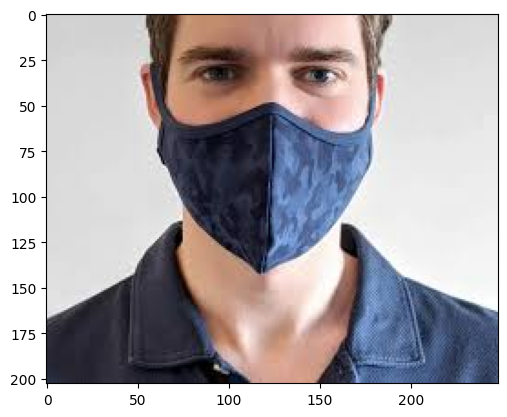

In [21]:
# displaying with mask image

img = mpimg.imread('/content/data/with_mask/with_mask_2641.jpg')
imgplot  = plt.imshow(img)
plt.show()

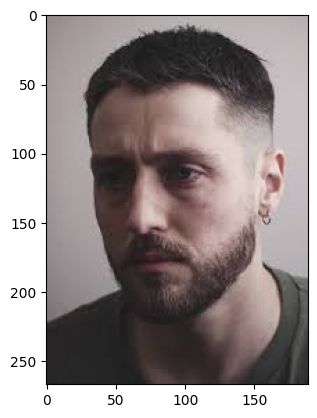

In [22]:
# displaying without mask image

img = mpimg.imread('/content/data/without_mask/without_mask_3414.jpg')
imgplot  = plt.imshow(img)
plt.show()

**Image processing**


1.   Resize the images
2.   Convert the images to numpy arrays



In [23]:
# convert images to numpy arrays

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [24]:
len(data)

7553

In [25]:
type(data)

list

array([[[160, 135, 104],
        [162, 138, 107],
        [166, 141, 109],
        ...,
        [ 31,  30,  36],
        [ 31,  31,  33],
        [ 30,  29,  35]],

       [[160, 135, 104],
        [162, 138, 107],
        [166, 141, 109],
        ...,
        [ 31,  30,  36],
        [ 31,  30,  33],
        [ 31,  30,  36]],

       [[160, 135, 104],
        [162, 138, 107],
        [166, 141, 109],
        ...,
        [ 31,  30,  36],
        [ 31,  30,  35],
        [ 31,  30,  37]],

       ...,

       [[110, 108,  85],
        [110, 109,  89],
        [ 97,  96,  85],
        ...,
        [ 22,  19,  26],
        [ 21,  19,  25],
        [ 20,  19,  23]],

       [[106, 103,  83],
        [106, 105,  88],
        [ 94,  92,  82],
        ...,
        [ 22,  19,  26],
        [ 21,  19,  25],
        [ 20,  19,  23]],

       [[106, 103,  84],
        [107, 103,  89],
        [ 94,  91,  83],
        ...,
        [ 22,  19,  26],
        [ 21,  19,  25],
        [ 20,  19,  23]]], dtype=uint8)
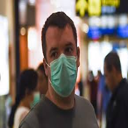

In [30]:
data[1]

In [31]:
type(data[1])

numpy.ndarray

In [32]:
data[1].shape

(128, 128, 3)

In [33]:
# converting images list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)
type(X)

numpy.ndarray

In [34]:
type(Y)

numpy.ndarray

In [35]:
print(X.shape)

(7553, 128, 128, 3)


In [36]:
print(Y.shape)

(7553,)


In [37]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [39]:
# scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [40]:
X_train[[0]]

array([[[[182, 151, 110],
         [172, 146, 103],
         [164, 142, 100],
         ...,
         [  8,   3,   0],
         [  9,   4,   1],
         [ 11,   6,   3]],

        [[180, 150, 108],
         [174, 149, 106],
         [168, 146, 104],
         ...,
         [  7,   2,   0],
         [  9,   4,   1],
         [ 10,   5,   2]],

        [[178, 150, 108],
         [177, 152, 109],
         [171, 150, 108],
         ...,
         [  7,   2,   0],
         [  8,   3,   0],
         [ 10,   5,   2]],

        ...,

        [[217, 178, 116],
         [211, 176, 121],
         [155, 125,  81],
         ...,
         [ 73,  46,  22],
         [ 49,  27,   8],
         [ 30,  13,   0]],

        [[206, 168, 110],
         [209, 174, 120],
         [164, 133,  85],
         ...,
         [ 73,  45,  21],
         [ 50,  28,   8],
         [ 31,  14,   0]],

        [[195, 158,  99],
         [205, 171, 116],
         [173, 142,  94],
         ...,
         [ 75,  47,  23],
        

In [41]:
X_train_scaled[0]

array([[[0.71372549, 0.59215686, 0.43137255],
        [0.6745098 , 0.57254902, 0.40392157],
        [0.64313725, 0.55686275, 0.39215686],
        ...,
        [0.03137255, 0.01176471, 0.        ],
        [0.03529412, 0.01568627, 0.00392157],
        [0.04313725, 0.02352941, 0.01176471]],

       [[0.70588235, 0.58823529, 0.42352941],
        [0.68235294, 0.58431373, 0.41568627],
        [0.65882353, 0.57254902, 0.40784314],
        ...,
        [0.02745098, 0.00784314, 0.        ],
        [0.03529412, 0.01568627, 0.00392157],
        [0.03921569, 0.01960784, 0.00784314]],

       [[0.69803922, 0.58823529, 0.42352941],
        [0.69411765, 0.59607843, 0.42745098],
        [0.67058824, 0.58823529, 0.42352941],
        ...,
        [0.02745098, 0.00784314, 0.        ],
        [0.03137255, 0.01176471, 0.        ],
        [0.03921569, 0.01960784, 0.00784314]],

       ...,

       [[0.85098039, 0.69803922, 0.45490196],
        [0.82745098, 0.69019608, 0.4745098 ],
        [0.60784314, 0

**Building a Convolutional Neural Networks (CNN)**

In [42]:
import tensorflow as tf
from tensorflow import keras

In [43]:
num_of_classes = 2

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
# compile the Neural Network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [45]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 17s 60ms/step - acc: 0.7062 - loss: 0.6600 - val_acc: 0.9091 - val_loss: 0.2444
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.8704 - loss: 0.3086 - val_acc: 0.9174 - val_loss: 0.2100
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9097 - loss: 0.2368 - val_acc: 0.9074 - val_loss: 0.2197
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.9176 - loss: 0.1913 - val_acc: 0.9372 - val_loss: 0.2061
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9355 - loss: 0.1750 - val_acc: 0.9190 - val_loss: 0.2070
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9446 - loss: 0.1489 - val_acc: 0.9355 - val_loss: 0.1971
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9556 - loss: 0.1156 - val_acc: 0.9273 - val_loss: 0.1976
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.9543 - loss: 0.1179 - val_acc: 0.9322 - val_loss: 0.2276
Epoch 9/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms

**Model Evaluation**

In [46]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - acc: 0.9402 - loss: 0.1625
Test accuracy = 0.9305095672607422


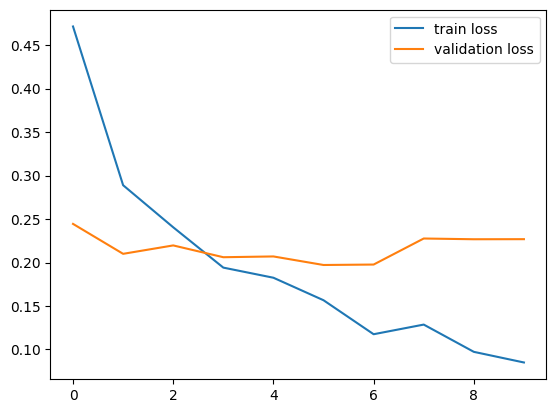

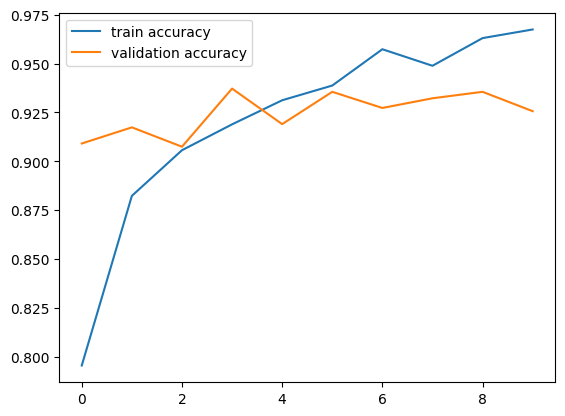

In [47]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/data/without_mask/without_mask_3410.jpg


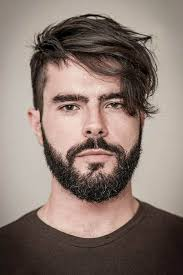

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[0.57839835 0.3893716 ]]
0
The person in the image in not waring a mask


In [51]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is waring a mask.')
else:
  print('The person in the image in not waring a mask')